# Import Necessary Libraries #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
#import data into data frame
df_us_lifts = pd.read_csv('UnitedStates_liftdata.csv')
df_us_lifts.head()

,Unnamed: 0,Country,State,Resort,Status,Lift Name,Type,Manufacturer,Years of Operation,Capacity,...,Length,Horsepower,Line Speed,Chairs,Towers,Drive,Tension,Ride Time,Notes,Log into your Facebook account to share.Phone number or emailFacebook PasswordorForgot password?
0,0,United States,Alabama,Montgomery Zoo,Operating,Zoofari Skylift,Double,Mueller,2012-,NaN,...,NaN,NaN,NaN,53.0,9.0,East,East,NaN,NaN,NaN
1,0,United States,Alaska,Alyeska,Operating,Bear Cub,Quad,Doppelmayr CTEC,2008-,1200.0,...,1156,100.0,300.0,40.0,6.0,Top,Bottom,3.9,NaN,NaN
2,1,United States,Alaska,Alyeska,Operating,Chair 7,Quad,Poma,1993-,2000.0,...,2815,100.0,500.0,94.0,11.0,Top,Top,5.6,Midstation and Loading Carpet,NaN
3,2,United States,Alaska,Alyeska,Operating,Glacier Bowl Express,High Speed Quad,Doppelmayr,2013-,2400.0,...,4307,800.0,1000.0,92.0,17.0,Bottom,Top,4.3,NaN,NaN
4,3,United States,Alaska,Alyeska,Operating,Ted's Express,High Speed Quad,Doppelmayr,2012-,1800.0,...,4455,453.0,984.0,70.0,17.0,Bottom,Top,4.5,NaN,NaN


In [3]:
df_us_lifts.describe(include = 'all')

,Unnamed: 0,Country,State,Resort,Status,Lift Name,Type,Manufacturer,Years of Operation,Capacity,...,Length,Horsepower,Line Speed,Chairs,Towers,Drive,Tension,Ride Time,Notes,Log into your Facebook account to share.Phone number or emailFacebook PasswordorForgot password?
count,4154.000000,4154,4154,4154,4154,3913,4152,4034,3974,3236.000000,...,3394,1411.000000,2893.000000,1301.000000,2411.000000,2896,2821,2880.000000,873,0.0
unique,NaN,1,45,545,4,2246,53,74,1030,NaN,...,2188,NaN,NaN,NaN,NaN,18,17,NaN,578,NaN
top,NaN,United States,Colorado,Palisades Tahoe,Operating,T-Bar,Double,Riblet,1964-,NaN,...,1000,NaN,NaN,NaN,NaN,Bottom,Bottom,NaN,Relocated,NaN
freq,NaN,4154,541,93,2302,92,1499,534,72,NaN,...,20,NaN,NaN,NaN,NaN,1860,2059,NaN,90,NaN
mean,9.341117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.032447,...,NaN,351.366584,569.521604,86.174481,12.488594,NaN,NaN,5.505347,NaN,NaN
std,11.909560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,688.808883,...,NaN,299.853664,253.909660,48.154538,7.244470,NaN,NaN,2.928916,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,...,NaN,3.000000,144.000000,1.000000,0.000000,NaN,NaN,0.400000,NaN,NaN
25%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,...,NaN,100.000000,422.000000,50.000000,7.000000,NaN,NaN,3.200000,NaN,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.000000,...,NaN,250.000000,465.000000,81.000000,11.000000,NaN,NaN,5.000000,NaN,NaN
75%,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800.000000,...,NaN,500.000000,550.000000,118.000000,16.000000,NaN,NaN,7.200000,NaN,NaN


In [4]:
df_us_lifts.columns

Index(['Unnamed: 0', 'Country', 'State', 'Resort', 'Status', 'Lift Name',
       'Type', 'Manufacturer', 'Years of Operation', 'Capacity',
       'Vertical Rise', 'Length', 'Horsepower', 'Line Speed', 'Chairs',
       'Towers', 'Drive', 'Tension', 'Ride Time', 'Notes',
       'Log into your Facebook account to share.Phone number or emailFacebook PasswordorForgot password?'],
      dtype='object')

# Investigating Data #
Here are the next steps that I would like to take when looking at the data:
## Clean Data ##
The following needs to be done to make use of the data:
1. Remove and unnamed and useless columns.
2. Find all of the different status of lifts. (remove all of the lifts out of commision)
3. Find all the different types and manufacturers of skilifts as well as their counts.
4. Find how many entries have NaN values for chairs.  
5. Find function of how many chairs per tower of a lift and per length of lift (that do not have nan values).  Use this value to estimate how many chairs are on lifts without values.
6. Estimate how many chairs are in the USA.


In [5]:

#remove first and last column
df_us_lifts.drop(['Unnamed: 0', 'Log into your Facebook account to share.Phone number or emailFacebook PasswordorForgot password?'], axis=1, inplace=True)
df_us_lifts.head()

,Country,State,Resort,Status,Lift Name,Type,Manufacturer,Years of Operation,Capacity,Vertical Rise,Length,Horsepower,Line Speed,Chairs,Towers,Drive,Tension,Ride Time,Notes
0,United States,Alabama,Montgomery Zoo,Operating,Zoofari Skylift,Double,Mueller,2012-,NaN,NaN,NaN,NaN,NaN,53.0,9.0,East,East,NaN,NaN
1,United States,Alaska,Alyeska,Operating,Bear Cub,Quad,Doppelmayr CTEC,2008-,1200.0,288.0,1156,100.0,300.0,40.0,6.0,Top,Bottom,3.9,NaN
2,United States,Alaska,Alyeska,Operating,Chair 7,Quad,Poma,1993-,2000.0,289.0,2815,100.0,500.0,94.0,11.0,Top,Top,5.6,Midstation and Loading Carpet
3,United States,Alaska,Alyeska,Operating,Glacier Bowl Express,High Speed Quad,Doppelmayr,2013-,2400.0,1401.0,4307,800.0,1000.0,92.0,17.0,Bottom,Top,4.3,NaN
4,United States,Alaska,Alyeska,Operating,Ted's Express,High Speed Quad,Doppelmayr,2012-,1800.0,1348.0,4455,453.0,984.0,70.0,17.0,Bottom,Top,4.5,NaN


In [6]:
#find number of chair lifts in each status listed
df_us_lifts['Status'].value_counts()


Operating       2302
Removed         1833
Standing          17
Construction       2
Name: Status, dtype: int64

In [7]:
#grab only operating chair lifts
df_us_operating = df_us_lifts[df_us_lifts['Status']=='Operating']

In [8]:
#find different types of ski lifts. print top 10
df_us_lifts['Type'].value_counts()[0:10]
#we will eventually want to remove lift types that aren't applicable

Double             1499
Triple              791
Quad                454
High Speed Quad     429
T-Bar               349
Platter             275
High Speed Six       92
J-Bar                58
Gondola 8            41
Gondola 4            39
Name: Type, dtype: int64

In [9]:
# find different manufacturers. only print the top 10
df_us_lifts['Manufacturer'].value_counts()[0:10]

Riblet             534
Hall               525
Doppelmayr         474
Poma               425
Yan                339
Borvig             250
Garaventa CTEC     180
Doppelmayr CTEC    172
CTEC               151
Leitner-Poma       147
Name: Manufacturer, dtype: int64

In [10]:
#how many chair lifts do not have data for number of chairs
df_us_lifts['Chairs'].isna().value_counts()

True     2853
False    1301
Name: Chairs, dtype: int64

In [11]:
df_us_chair_data = df_us_lifts[df_us_lifts['Chairs'].isna()==False]
#filter out anything that isn't a double, triple, high speed quad, quad, or a high speed 6
df_us_chair_data = df_us_chair_data[df_us_chair_data['Type'].isin(['Double','Triple','High Speed Quad','Quad', 'High Speed Six'])]
df_us_chair_data['Type'].value_counts()

Double             378
Triple             293
High Speed Quad    245
Quad               187
High Speed Six      58
Name: Type, dtype: int64

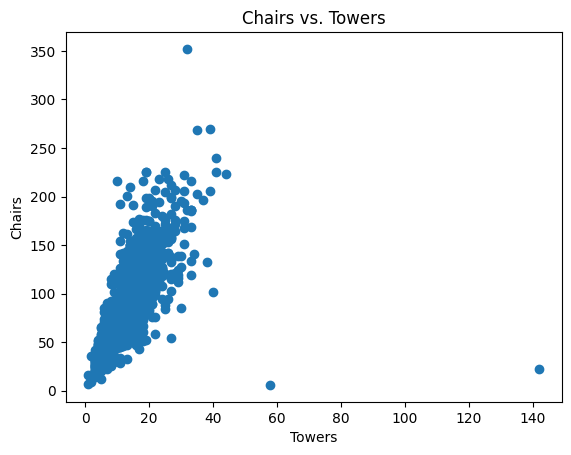

In [12]:
# plot chairs vs. towers
towers = df_us_chair_data['Towers']
chairs = df_us_chair_data['Chairs']
plt.title('Chairs vs. Towers')
plt.xlabel('Towers')
plt.ylabel('Chairs')
plt.scatter(towers, chairs)


The bulk of the data apears to be linear.  In the above scatter plot, there are two data points that would throw off any sort of regression if we wanted to predict number of chairs based on towers.  We need to find them and remove them.

In [13]:
df_us_chairs_cleaned = df_us_chair_data[df_us_chair_data['Towers'] < 57]

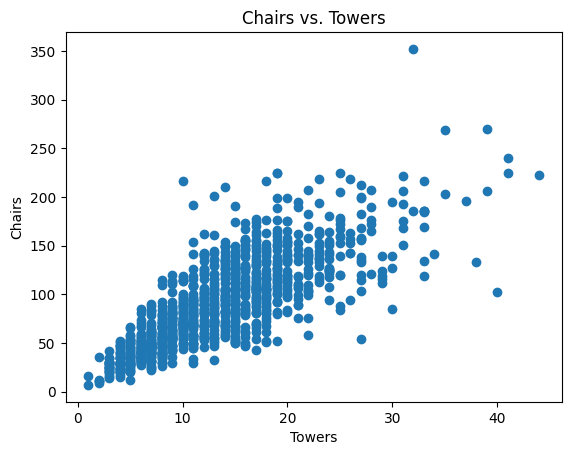

In [14]:
# plot chairs vs. towers
towers = df_us_chairs_cleaned['Towers']
chairs = df_us_chairs_cleaned['Chairs']
plt.title('Chairs vs. Towers')
plt.xlabel('Towers')
plt.ylabel('Chairs')
plt.scatter(towers, chairs)

In [15]:
# fit a linear regression
# reshape data
X = np.array(towers).reshape(-1,1)
reg = LinearRegression().fit(X, chairs)
a = reg.coef_[0]
b = reg.intercept_

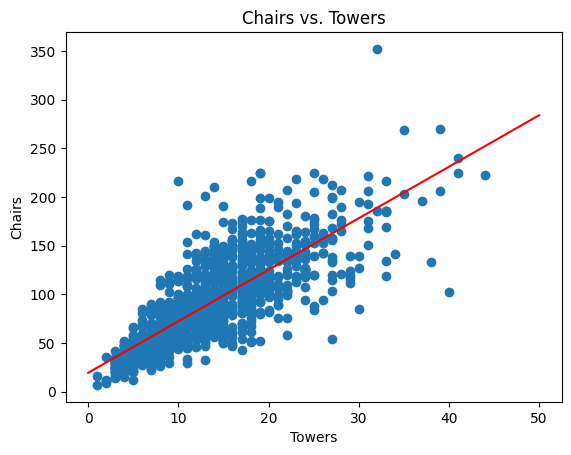

In [16]:
# replot scatter with regression
x = np.linspace(0,50).reshape(-1,1)
y_pred = reg.predict(x)

towers = df_us_chairs_cleaned['Towers']
chairs = df_us_chairs_cleaned['Chairs']
plt.title('Chairs vs. Towers')
plt.xlabel('Towers')
plt.ylabel('Chairs')
plt.plot(x, y_pred, color = 'r')
plt.scatter(towers, chairs)


In [59]:
#How many lifts do not have chair data or tower data
df_us_lifts[df_us_lifts['Chairs'].isna()]['Towers'].isna().value_counts()

#How many lifts do not have chair data or length data
df_us_lifts[df_us_lifts['Chairs'].isna()]['Length'].isna().value_counts()


False    2319
True      534
Name: Length, dtype: int64

In [48]:
# estimate chairs in entries that don't have a chair value but do have a tower value
#remove entries that don't have chair AND tower data
have_towers = ~df_us_lifts['Towers'].isna()
have_chairs = ~df_us_lifts['Chairs'].isna()
chairs_or_towers = [have_towers[i] or have_chairs[i] for i in range(len(no_towers))]
df_us_estimate = df_us_lifts[chairs_or_towers]


df_us_estimate.head()
# df_us_chair_data['Estimated Chair Count'] = reg.predict(np.array(df_us_chair_data['Towers']).reshape(-1,1))

,Country,State,Resort,Status,Lift Name,Type,Manufacturer,Years of Operation,Capacity,Vertical Rise,Length,Horsepower,Line Speed,Chairs,Towers,Drive,Tension,Ride Time,Notes
0,United States,Alabama,Montgomery Zoo,Operating,Zoofari Skylift,Double,Mueller,2012-,NaN,NaN,NaN,NaN,NaN,53.0,9.0,East,East,NaN,NaN
1,United States,Alaska,Alyeska,Operating,Bear Cub,Quad,Doppelmayr CTEC,2008-,1200.0,288.0,1156,100.0,300.0,40.0,6.0,Top,Bottom,3.9,NaN
2,United States,Alaska,Alyeska,Operating,Chair 7,Quad,Poma,1993-,2000.0,289.0,2815,100.0,500.0,94.0,11.0,Top,Top,5.6,Midstation and Loading Carpet
3,United States,Alaska,Alyeska,Operating,Glacier Bowl Express,High Speed Quad,Doppelmayr,2013-,2400.0,1401.0,4307,800.0,1000.0,92.0,17.0,Bottom,Top,4.3,NaN
4,United States,Alaska,Alyeska,Operating,Ted's Express,High Speed Quad,Doppelmayr,2012-,1800.0,1348.0,4455,453.0,984.0,70.0,17.0,Bottom,Top,4.5,NaN


In [82]:
#loop through dataframe if the lift does not have chair data then use the regression to predict it
chairs = []
for key, item in df_us_estimate.iterrows():
    print(key)
    if pd.isna(item['Chairs']):
        num_towers = np.array(item['Towers']).reshape(-1,1)
        chairs[key] = round(reg.predict(num_towers)[0])
    else:
        chairs[key] = item['Chairs']
    

#add new column of estimated chairs to the df
df_us_estimate['Estimated Chairs'] = chairs

0


IndexError: list assignment index out of range

In [83]:
print(chairs)

[]


[False, True, False, False]